# عبدالرحمن امرالله عبد العظيم - Section 2 - 43806 - Python 3.5

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import scipy.signal
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

%matplotlib inline

<br/>
Variables

In [2]:
mpl.rcParams['agg.path.chunksize'] = 10000
plt.rcParams['figure.figsize'] = [15, 10]
e1=[]
e2=[]
#for threshold = 3.5*std
e1spikes_matrix = np.zeros(shape=(6165,49))
e2spikes_matrix = np.zeros(shape=(3454,49))
#for threshold = 5*std
e1spikes_matrix_5 = np.zeros(shape=(2459,49))
e2spikes_matrix_5 = np.zeros(shape=(586,49))

templates=np.zeros(shape=(2,49))
predictedclusters=[]

time=[]
timei=0
T=1/24414

<br/>
Reading data from file

In [3]:
f = open ('Data.txt','r')
f_contents = f.readlines()

for item in f_contents:
    item.replace("\n","")
    l=item.split()
    e1.append((float(l[0])))
    e2.append((float(l[1])))
    time.append(timei)
    timei+=T
f.close()
negative_e1=[ -x for x in e1]
negative_e2=[-x for x in e2]

<br/>
Getting standard deviation

In [4]:
e1_abs=[]
e2_abs=[]

for i in range(len(e1)):
    e1_abs.append(abs(e1[i]))
for i in range(len(e2)):
    e2_abs.append(abs(e2[i]))

np1=np.asarray(e1[0:500])
e1_std=np.std(np1)
np2=np.asarray(e2[0:500])
e2_std=np.std(np2)

# Threshold = (3.5)(Std Deviation)
For the case of threshold = 5(std deviation) scroll down<br/><br/><br/><br/>
Getting Electrode1, Electrode2 spikes

In [5]:
e1_ppeaks, _ = scipy.signal.find_peaks(e1_abs, height=(3.5*e1_std),distance=49)
#e1_npeaks, _ = scipy.signal.find_peaks(negative_e1, height=(3.5*e1_std),distance=49)
e1_peaksindex=e1_ppeaks.tolist()#+e1_npeaks.tolist()
#e1_peaksindex.sort()

e2_ppeaks, _ = scipy.signal.find_peaks(e2_abs, height=(3.5*e2_std),distance=49)
#e1_npeaks, _ = scipy.signal.find_peaks(negative_e1, height=(3.5*e1_std),distance=49)
e2_peaksindex=e2_ppeaks.tolist()#+e1_npeaks.tolist()
#e1_peaksindex.sort()

<br/>
Plot Electrode1 with spikes

6165


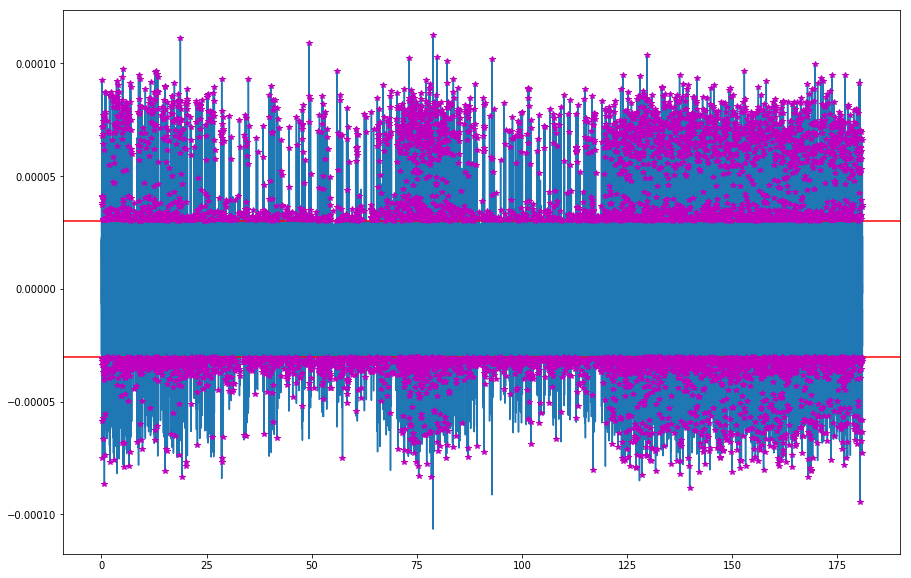

In [6]:
print(len(e1_peaksindex))
plt1=plt.plot(time,e1)
plt1=plt.axhline(y=(3.5*e1_std), color='r', linestyle='-')
plt1=plt.axhline(y=(-3.5*e1_std), color='r', linestyle='-')
for i in range(len(e1_peaksindex)):
    plt1=plt.plot(time[e1_peaksindex[i]],e1[e1_peaksindex[i]],"*",color='m')
plt.show(plt1)

<br/>
Plot electrode2 with spikes

3454


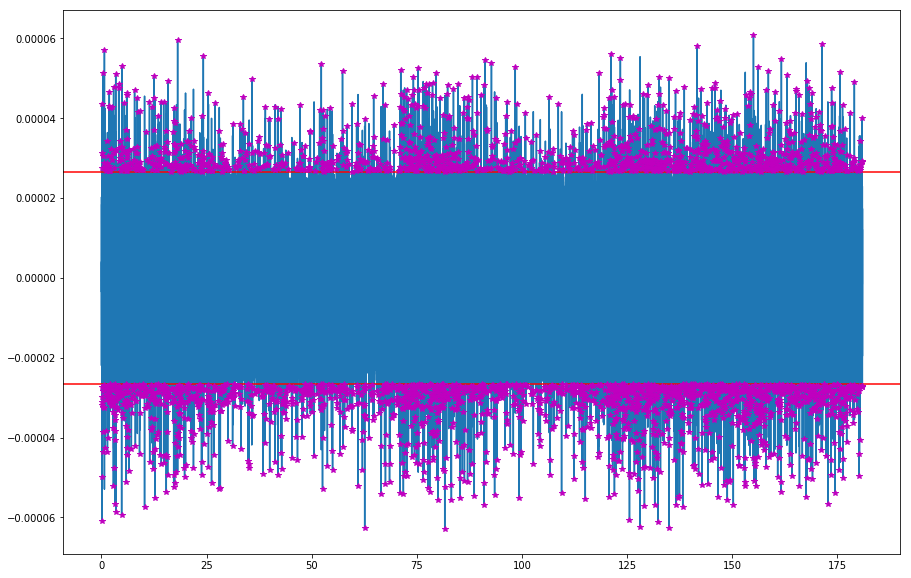

In [7]:
print(len(e2_peaksindex))
plt2=plt.plot(time,e2)
plt2=plt.axhline(y=(3.5*e2_std), color='r', linestyle='-')
plt2=plt.axhline(y=(-3.5*e2_std), color='r', linestyle='-')
for i in range(len(e2_peaksindex)):
    plt2=plt.plot(time[e2_peaksindex[i]],e2[e2_peaksindex[i]],"*",color='m')
plt.show(plt2)

<br/>
Alignment of electrode1 spikes in a matrix

In [8]:
spikeno=0
for i in e1_peaksindex:
    start=i-24
    end=i+24
    k = 0
    for j in range(start, end):
        e1spikes_matrix[spikeno][k]=e1[j]
        k+=1
    spikeno+=1

<br/>
Alignment of electrode2 spikes in a matrix

In [9]:
spike2no=0
for i in e2_peaksindex:
    start=i-24
    end=i+24
    k = 0
    for j in range(start, end):
        e2spikes_matrix[spike2no][k]=e2[j]
        k+=1
    spike2no+=1

<br/>
Apply PCA on electrode1 spikes and plotting it

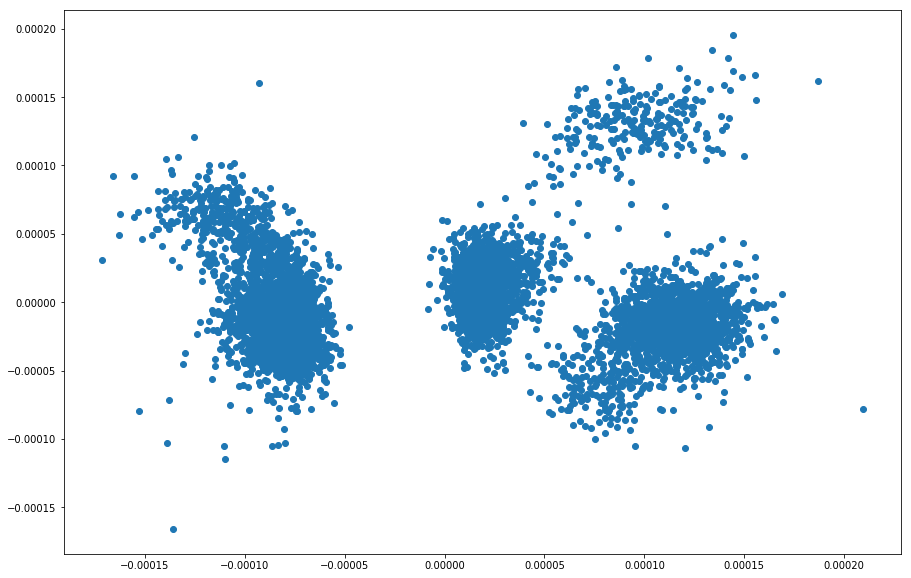

In [10]:
pca = PCA(n_components=2)
pcaspikes_1_3_5 = pca.fit_transform(e1spikes_matrix)

plt3=plt.plot(pcaspikes_1_3_5[:, 0], pcaspikes_1_3_5[:, 1], 'o')
plt.show(plt3)

<br/>
Apply PCA on electrode2 spikes and plotting it

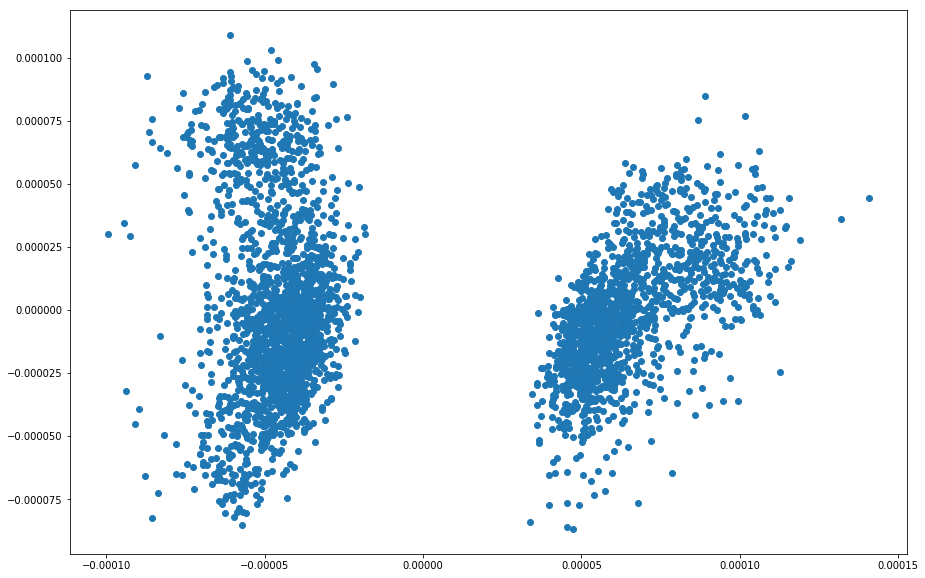

In [11]:
pca = PCA(n_components=2)
pcaspikes_2_3_5 = pca.fit_transform(e2spikes_matrix)

plt4=plt.plot(pcaspikes_2_3_5[:, 0], pcaspikes_2_3_5[:, 1], 'o')
plt.show(plt4)

<br/>
Applying Kmeans on Electrode1 spikes and plotting 

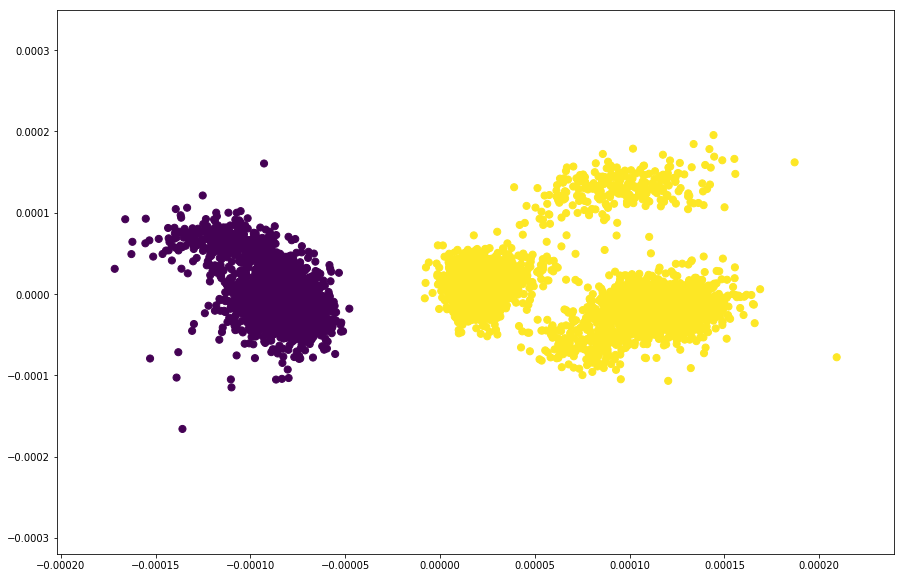

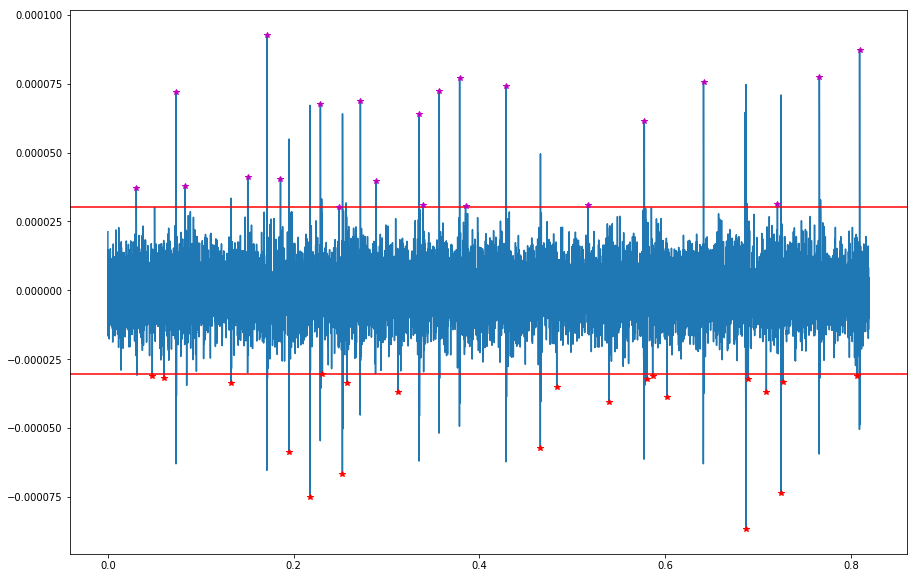

In [12]:
kmeans_1_3_5 = KMeans(n_clusters=2).fit(e1spikes_matrix)
y_kmeans = kmeans_1_3_5.predict(e1spikes_matrix)
centers = kmeans_1_3_5.cluster_centers_

predictedclusters=kmeans_1_3_5.labels_

plt.scatter(pcaspikes_1_3_5[:, 0], pcaspikes_1_3_5[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.margins(x=-0.475, y=-0.475)
plt.show()

#A figure showing the first 20,000 samples of the raw data of each channel with an “*” marking the detected spikes colored with different colors depending on the neuron each spike belongs to
plt5=plt.plot(time[0:20000],e1[0:20000])
plt5=plt.axhline(y=(3.5*e1_std), color='r', linestyle='-')
plt5=plt.axhline(y=(-3.5*e1_std), color='r', linestyle='-')
for i in range(0,43):
    if predictedclusters[i]==0:#red class
        plt5=plt.plot(time[e1_peaksindex[i]],e1[e1_peaksindex[i]],"*",color='r')
    elif predictedclusters[i]==1:#violet class
        plt5=plt.plot(time[e1_peaksindex[i]],e1[e1_peaksindex[i]],"*",color='m')
plt.show(plt5)

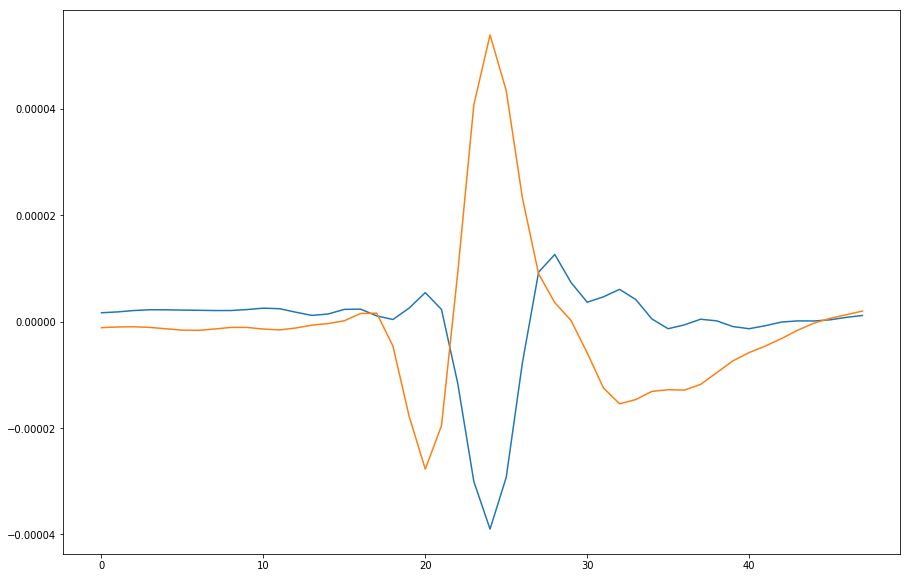

In [13]:
zerocluster=0
onecluster=0
for i in predictedclusters:
    if i == 0:
        zerocluster+=1
    else:
        onecluster+=1
for i in range(len(predictedclusters)):
    if predictedclusters[i]==0:
        templates[0]+=e1spikes_matrix[i]
    else:
        templates[1]+=e1spikes_matrix[i]
templates[0]/=zerocluster
templates[1]/=onecluster
for k in range(2):
    plt.plot([i for i in range(48)], [templates[k, i] for i in range(48)])
plt.show()


<br/>
Applying Kmeans on Electrode2 spikes and plotting

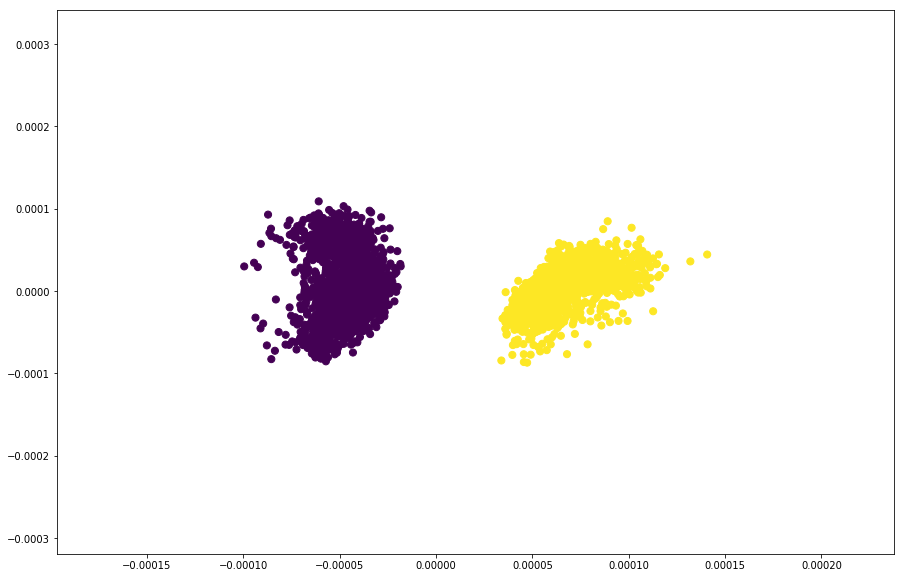

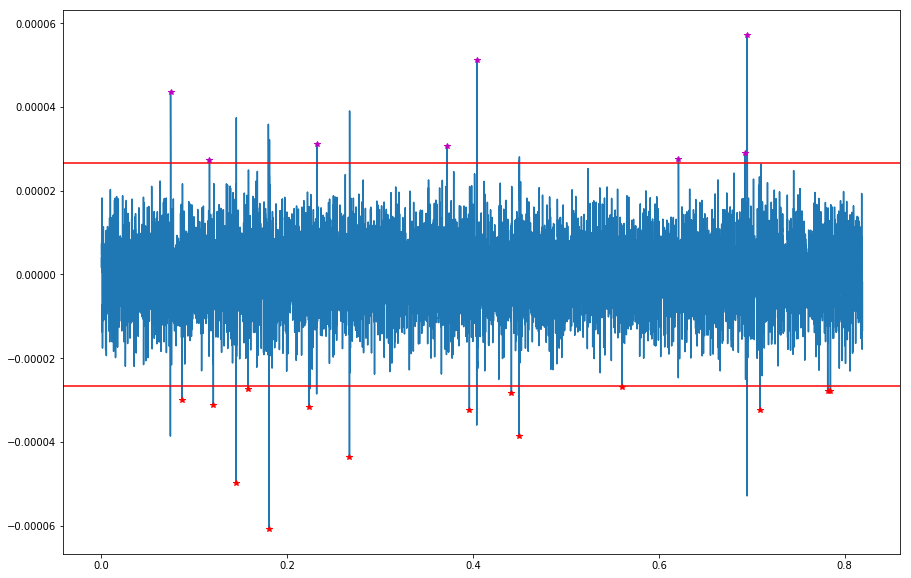

In [14]:
kmeans_2_3_5 = KMeans(n_clusters=2).fit(e2spikes_matrix)
y_kmeans = kmeans_2_3_5.predict(e2spikes_matrix)
centers = kmeans_2_3_5.cluster_centers_

predictedclusters=kmeans_2_3_5.labels_

plt.scatter(pcaspikes_2_3_5[:, 0], pcaspikes_2_3_5[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.margins(x=-0.475, y=-0.475)
plt.show()

#A figure showing the first 20,000 samples of the raw data of each channel with an “*” marking the detected spikes colored with different colors depending on the neuron each spike belongs to
plt6=plt.plot(time[0:20000],e2[0:20000])
plt6=plt.axhline(y=(3.5*e2_std), color='r', linestyle='-')
plt6=plt.axhline(y=(-3.5*e2_std), color='r', linestyle='-')
for i in range(0,22):
    if predictedclusters[i]==0:#red class
        plt6=plt.plot(time[e2_peaksindex[i]],e2[e2_peaksindex[i]],"*",color='r')
    elif predictedclusters[i]==1:#violet class
        plt6=plt.plot(time[e2_peaksindex[i]],e2[e2_peaksindex[i]],"*",color='m')
plt.show(plt6)

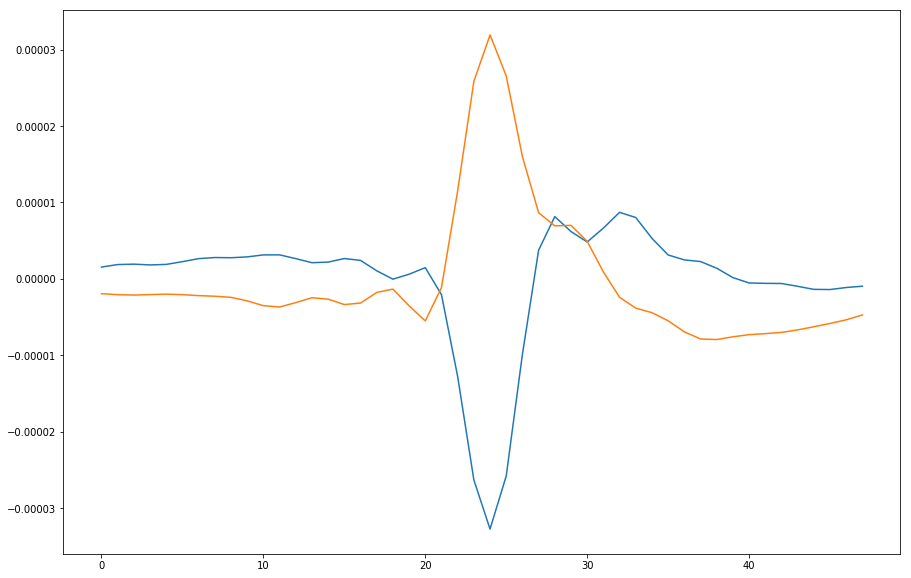

In [15]:
templates.fill(0)
zerocluster=0
onecluster=0
for i in predictedclusters:
    if i == 0:
        zerocluster+=1
    else:
        onecluster+=1
for i in range(len(predictedclusters)):
    if predictedclusters[i]==0:
        templates[0]+=e2spikes_matrix[i]
    else:
        templates[1]+=e2spikes_matrix[i]
templates[0]/=zerocluster
templates[1]/=onecluster
for k in range(2):
    plt.plot([i for i in range(48)], [templates[k, i] for i in range(48)])
plt.show()

# Threshold = (5)(Std Deviation)

In [16]:
e1_ppeaks, _ = scipy.signal.find_peaks(e1_abs, height=(5*e1_std),distance=49)
#e1_npeaks, _ = scipy.signal.find_peaks(negative_e1, height=(3.5*e1_std),distance=49)
e1_peaksindex=e1_ppeaks.tolist()#+e1_npeaks.tolist()
#e1_peaksindex.sort()

e2_ppeaks, _ = scipy.signal.find_peaks(e2_abs, height=(5*e2_std),distance=49)
#e1_npeaks, _ = scipy.signal.find_peaks(negative_e1, height=(3.5*e1_std),distance=49)
e2_peaksindex=e2_ppeaks.tolist()#+e1_npeaks.tolist()
#e1_peaksindex.sort()

<br/>
Plot Electrode1 with spikes

2459


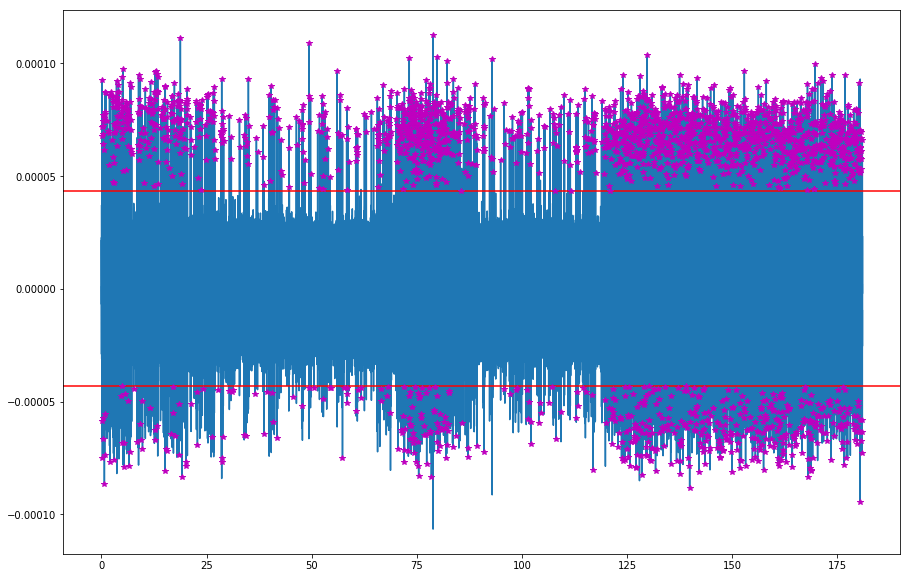

In [17]:
print(len(e1_peaksindex))
plt7=plt.plot(time,e1)
plt7=plt.axhline(y=(5*e1_std), color='r', linestyle='-')
plt7=plt.axhline(y=(-5*e1_std), color='r', linestyle='-')
for i in range(len(e1_peaksindex)):
    plt7=plt.plot(time[e1_peaksindex[i]],e1[e1_peaksindex[i]],"*",color='m')
plt.show(plt7)

<br/>
Plot electrode2 with spikes

586


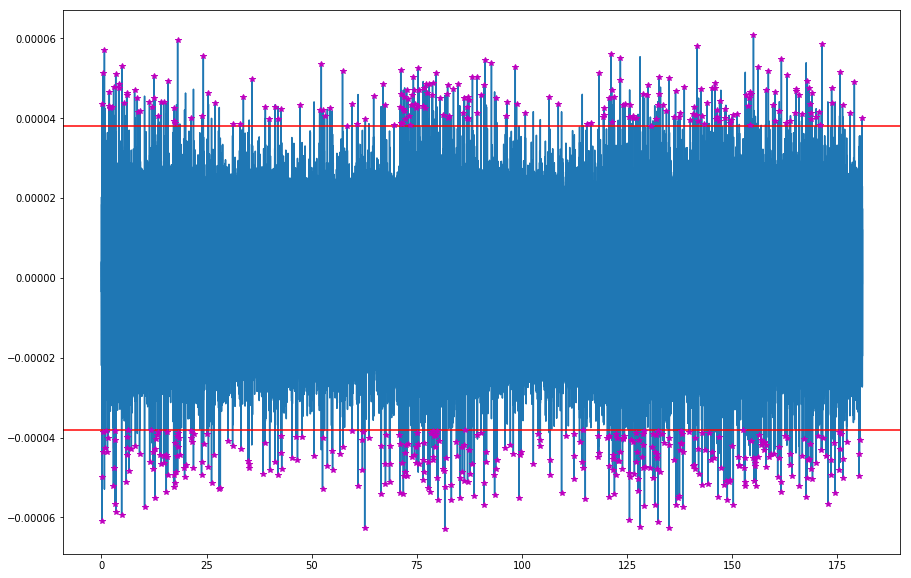

In [18]:
print(len(e2_peaksindex))
plt8=plt.plot(time,e2)
plt8=plt.axhline(y=(5*e2_std), color='r', linestyle='-')
plt8=plt.axhline(y=(-5*e2_std), color='r', linestyle='-')
for i in range(len(e2_peaksindex)):
    plt8=plt.plot(time[e2_peaksindex[i]],e2[e2_peaksindex[i]],"*",color='m')
plt.show(plt8)

<br/>
Alignment of electrode1 spikes in a matrix

In [19]:
spikeno=0
for i in e1_peaksindex:
    start=i-24
    end=i+24
    k = 0
    for j in range(start, end):
        e1spikes_matrix_5[spikeno][k]=e1[j]
        k+=1
    spikeno+=1

<br/>
Alignment of electrode2 spikes in a matrix

In [20]:
spike2no=0
for i in e2_peaksindex:
    start=i-24
    end=i+24
    k = 0
    for j in range(start, end):
        e2spikes_matrix_5[spike2no][k]=e2[j]
        k+=1
    spike2no+=1

<br/>
Apply PCA on electrode1 spikes and plotting it

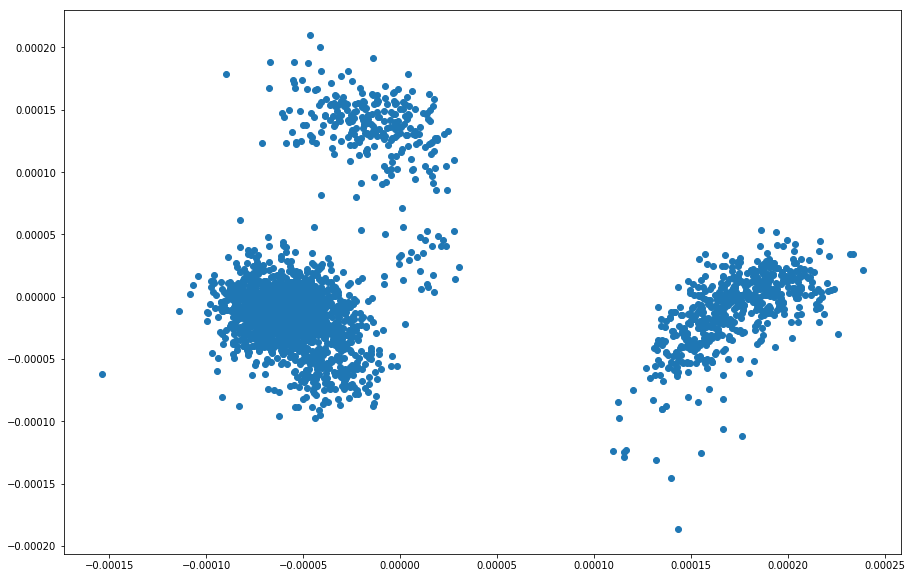

In [21]:
pca = PCA(n_components=2)
pcaspikes_1_5 = pca.fit_transform(e1spikes_matrix_5)

plt9=plt.plot(pcaspikes_1_5[:, 0], pcaspikes_1_5[:, 1], 'o')
plt.show(plt9)

<br/>
Apply PCA on electrode2 spikes and plotting it

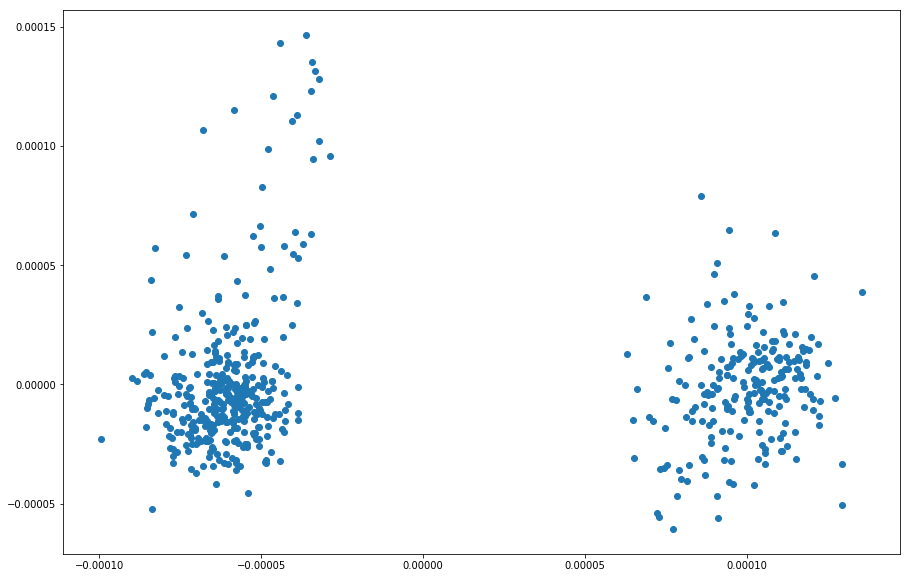

In [22]:
pca = PCA(n_components=2)
pcaspikes_2_5 = pca.fit_transform(e2spikes_matrix_5)

plt10=plt.plot(pcaspikes_2_5[:, 0], pcaspikes_2_5[:, 1], 'o')
plt.show(plt10)

<br/>
Applying Kmeans on Electrode1 spikes and plotting 

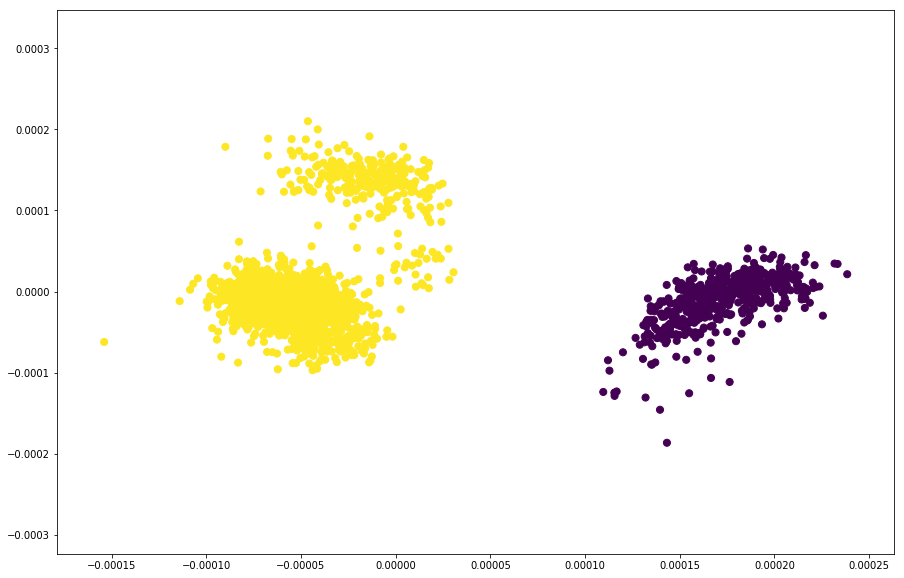

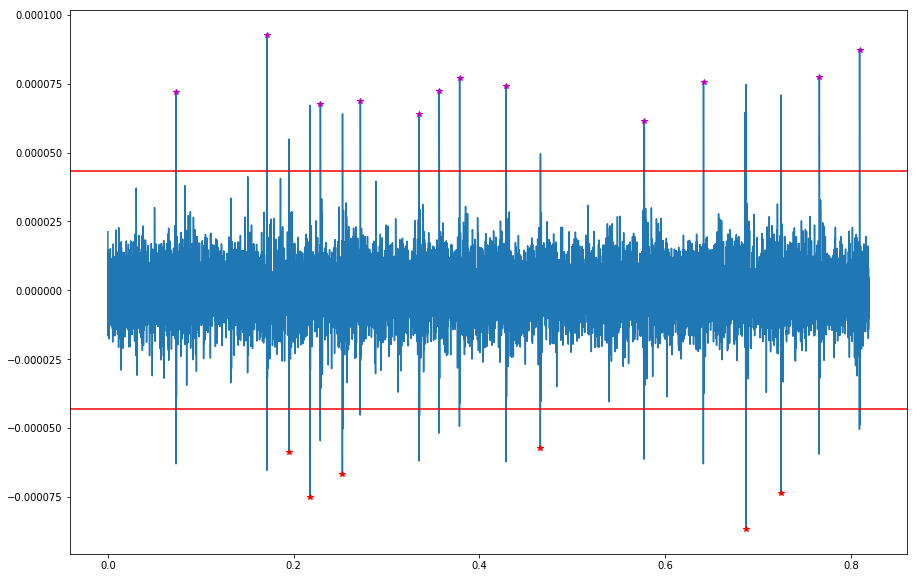

In [23]:
kmeans_1_5 = KMeans(n_clusters=2).fit(e1spikes_matrix_5)
y_kmeans = kmeans_1_5.predict(e1spikes_matrix_5)
centers = kmeans_1_5.cluster_centers_

predictedclusters=kmeans_1_5.labels_

plt.scatter(pcaspikes_1_5[:, 0], pcaspikes_1_5[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.margins(x=-0.475, y=-0.475)
plt.show()

#A figure showing the first 20,000 samples of the raw data of each channel with an “*” marking the detected spikes colored with different colors depending on the neuron each spike belongs to
plt11=plt.plot(time[0:20000],e1[0:20000])
plt11=plt.axhline(y=(5*e1_std), color='r', linestyle='-')
plt11=plt.axhline(y=(-5*e1_std), color='r', linestyle='-')
for i in range(0,18):
    if predictedclusters[i]==0:#red class
        plt11=plt.plot(time[e1_peaksindex[i]],e1[e1_peaksindex[i]],"*",color='r')
    elif predictedclusters[i]==1:#violet class
        plt11=plt.plot(time[e1_peaksindex[i]],e1[e1_peaksindex[i]],"*",color='m')
plt.show(plt11)

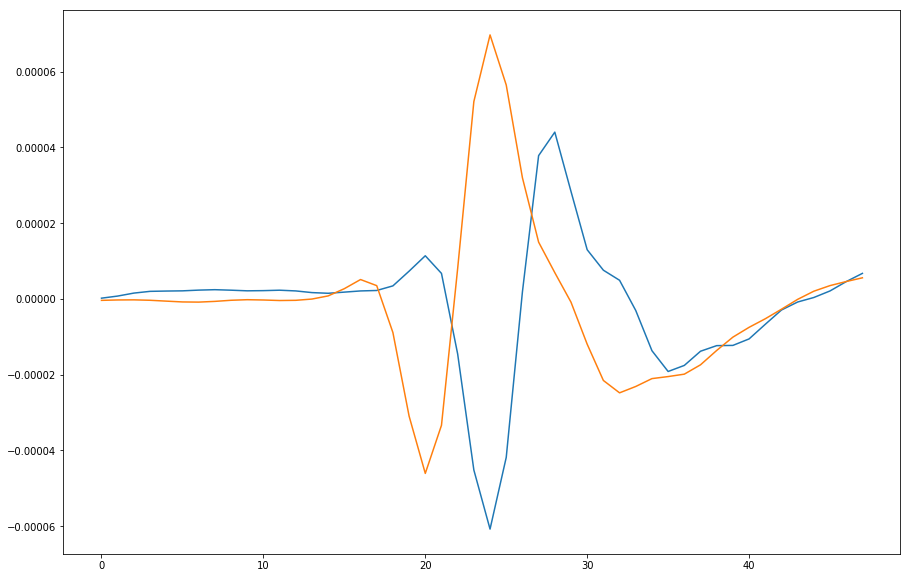

In [24]:
templates.fill(0)
zerocluster=0
onecluster=0
for i in predictedclusters:
    if i == 0:
        zerocluster+=1
    else:
        onecluster+=1
for i in range(len(predictedclusters)):
    if predictedclusters[i]==0:
        templates[0]+=e1spikes_matrix_5[i]
    else:
        templates[1]+=e1spikes_matrix_5[i]
templates[0]/=zerocluster
templates[1]/=onecluster
for k in range(2):
    plt.plot([i for i in range(48)], [templates[k, i] for i in range(48)])
plt.show()

<br/>
Applying Kmeans on Electrode2 spikes and plotting

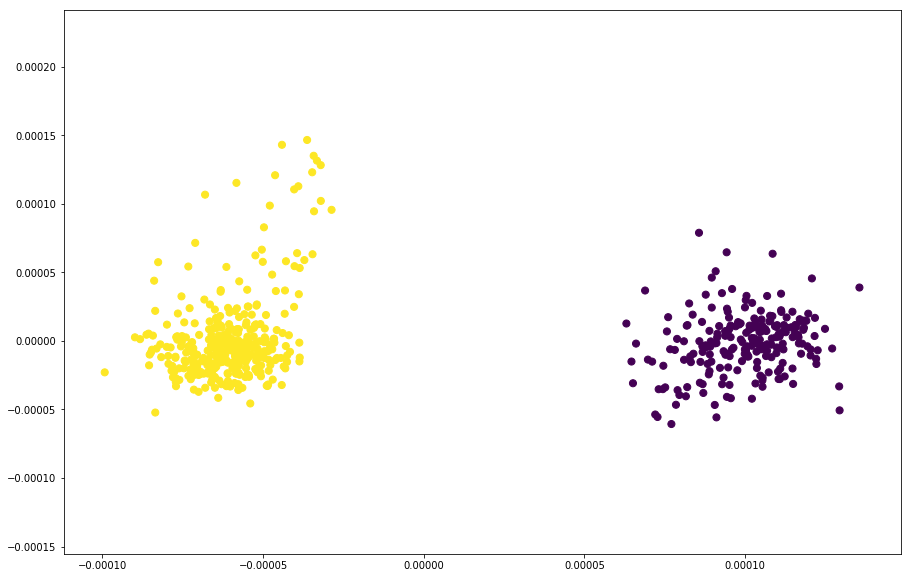

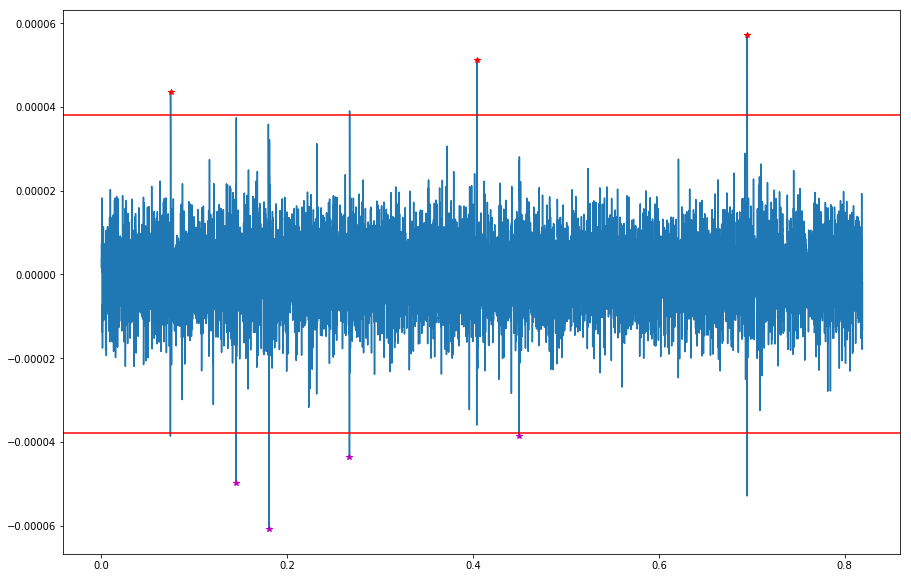

In [25]:
kmeans_2_5 = KMeans(n_clusters=2).fit(e2spikes_matrix_5)
y_kmeans = kmeans_2_5.predict(e2spikes_matrix_5)
centers = kmeans_2_5.cluster_centers_

predictedclusters=kmeans_2_5.labels_

plt.scatter(pcaspikes_2_5[:, 0], pcaspikes_2_5[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.margins(x=-0.485, y=-0.485)
plt.show()

#A figure showing the first 20,000 samples of the raw data of each channel with an “*” marking the detected spikes colored with different colors depending on the neuron each spike belongs to
plt12=plt.plot(time[0:20000],e2[0:20000])
plt12=plt.axhline(y=(5*e2_std), color='r', linestyle='-')
plt12=plt.axhline(y=(-5*e2_std), color='r', linestyle='-')
for i in range(0,7):
    if predictedclusters[i]==0:#red class
        plt12=plt.plot(time[e2_peaksindex[i]],e2[e2_peaksindex[i]],"*",color='r')
    else:#violet class
        plt12=plt.plot(time[e2_peaksindex[i]],e2[e2_peaksindex[i]],"*",color='m')
plt.show(plt12)

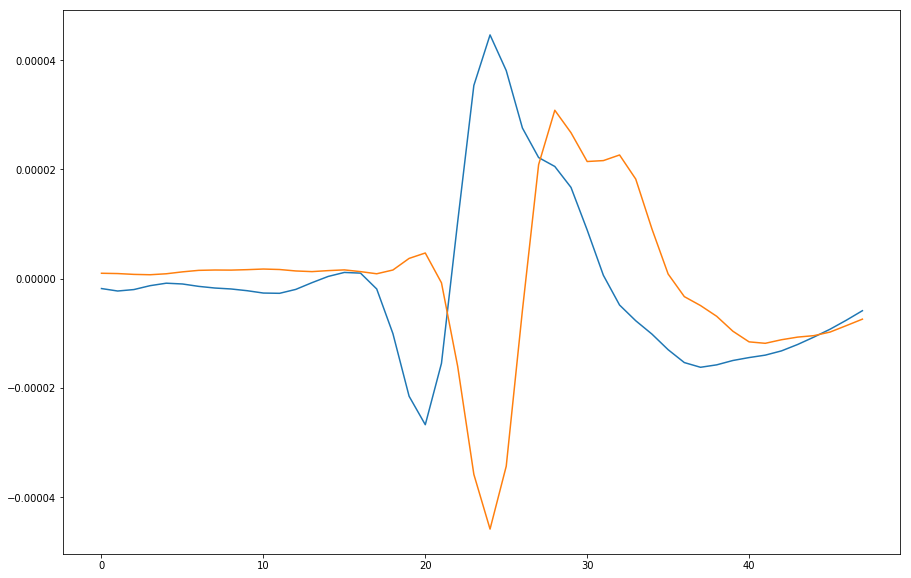

In [26]:
templates.fill(0)
zerocluster=0
onecluster=0
for i in predictedclusters:
    if i == 0:
        zerocluster+=1
    else:
        onecluster+=1
for i in range(len(predictedclusters)):
    if predictedclusters[i]==0:
        templates[0]+=e2spikes_matrix_5[i]
    else:
        templates[1]+=e2spikes_matrix_5[i]
templates[0]/=zerocluster
templates[1]/=onecluster
for k in range(2):
    plt.plot([i for i in range(48)], [templates[k, i] for i in range(48)])
plt.show()